In [2]:
from ouster import client, pcap
from contextlib import closing
from more_itertools import nth
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
pcap_path = '/Users/theodorjonsson/GithubProjects/OS0-128_Rev-06_fw23_Urban-Drive_Dual-Returns/OS0-128_Rev-06_fw23_Urban-Drive_Dual-Returns.pcap'
metadata_path = '/Users/theodorjonsson/GithubProjects/OS0-128_Rev-06_fw23_Urban-Drive_Dual-Returns/OS0-128_Rev-06_fw23_Urban-Drive_Dual-Returns.json'

In [14]:
with open(metadata_path,'r')as file:
    info = client.SensorInfo(file.read())
source = pcap.Pcap(pcap_path,info)
with closing(client.Scans(source)) as scans:
    scan = nth(scans, 50)

In [15]:
range_field = scan.field(client.ChanField.RANGE)
range_img = client.destagger(info, range_field)

In [16]:
print(type(range_img))
print(np.shape(range_img))




<class 'numpy.ndarray'>
(128, 1024)


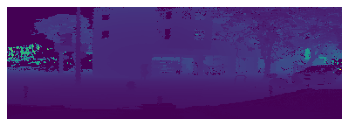

In [14]:
plt.imshow(range_img[:,640:1024], resample=False)
plt.axis('off')
plt.show()

In [19]:
xyzlut = client.XYZLut(info)
xyz = xyzlut(scan)
print(np.shape(xyz))

(128, 1024, 3)


In [25]:
%pylab qt
[x, y, z] = [c.flatten() for c in np.dsplit(xyz, 3)]
ax = plt.axes(projection='3d')
r = 10
ax.set_xlim3d([-r, r])
ax.set_ylim3d([-r, r])
ax.set_zlim3d([-r/2, r/2])
plt.axis('off')
z_col = np.minimum(np.absolute(z), 5)
ax.scatter(x, y, z, c=z_col, s=0.2)
plt.show()


Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['source', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
hostname = "os-122107000535.local"
port_lidar = 7502
port_imu = 7503

In [4]:
# establish sensor connection
config = client.SensorConfig()
# set the values that you need: see sensor documentation for param meanings
config.operating_mode = client.OperatingMode.OPERATING_NORMAL
config.lidar_mode = client.LidarMode.MODE_1024x10
config.udp_port_lidar = port_lidar
config.udp_port_imu = port_imu


# set the config on sensor, using appropriate flags
client.set_config(hostname, config, persist=True, udp_dest_auto=True)

In [7]:

port_lidar = 7502
port_imu = 7503

with closing(client.Scans.stream(hostname, port_lidar,
                                 complete=False)) as stream:
    show = True
    while show:
        i = 0
        for scan in stream:
            i += 1
            # uncomment if you'd like to see frame id printed
            print("frame id: {} ".format(scan.frame_id))
            signal = client.destagger(stream.metadata,
                                      scan.field(client.ChanField.SIGNAL))
            signal = (signal / np.max(signal) * 255).astype(np.uint8)
            cv2.imshow("scaled signal", signal)
            key = cv2.waitKey(1) & 0xFF
            if i < 10:
                break
        show = False

frame id: 577 
